## **Exploratory Data Analysis (EDA) of Historical Daily Prices for NASDAQ Stocks**

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=17f50e8a3eccc89980df000fbbde4379c44814e20e0ccc5537c26167491de21f
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import input_file_name, regexp_extract

# Create a SparkSession
spark = SparkSession.builder \
    .appName("Stock Analysis") \
    .getOrCreate()

# Read all CSV files into a DataFrame and add a column for the file name (which represents the company name)
stocks_df = spark.read.csv("/content/drive/MyDrive/stocks/*.csv", header=True, inferSchema=True) \
    .withColumn("Ticker", input_file_name())

# Extract the ticker from the file path
stocks_df = stocks_df.withColumn("Ticker", regexp_extract("Ticker", "/([^/]*)\.csv", 1))

# Show the DataFrame with the new "Ticker" column
stocks_df.show()


+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+------+
|      Date|               Open|               High|                Low|              Close|           Adj Close| Volume|Ticker|
+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+------+
|1962-01-02|0.09290800243616104|0.09602600336074829|0.09290800243616104|0.09290800243616104|0.058208759874105453| 841958|   DIS|
|1962-01-03|0.09290800243616104|0.09446699917316437|0.09290800243616104|0.09415499866008759| 0.05898997187614441| 801865|   DIS|
|1962-01-04|0.09415499866008759|0.09446699917316437| 0.0935320034623146|0.09415499866008759| 0.05898997187614441| 962238|   DIS|
|1962-01-05|0.09415499866008759|0.09477899968624115|0.09384399652481079|0.09446699917316437| 0.05918548256158829| 962238|   DIS|
|1962-01-08|0.09446699917316437|0.09571400284767151|0.09228499978780746|0.09415499866008759| 0.05

In [5]:
#count of rows
stocks_df.count()

7394132

In [6]:
stocks_df.tail(5)

[Row(Date=datetime.date(2024, 5, 1), Open=1.090000033378601, High=1.090000033378601, Low=0.75, Close=0.9156000018119812, Adj Close=0.9156000018119812, Volume=255515, Ticker='CIFRW'),
 Row(Date=datetime.date(2024, 5, 1), Open=0.6011000275611877, High=0.625, Low=0.6011000275611877, Close=0.625, Adj Close=0.625, Volume=3000, Ticker='AIRJW'),
 Row(Date=datetime.date(2016, 8, 10), Open=0.0, High=0.0, Low=0.0, Close=25.299999237060547, Adj Close=25.299999237060547, Volume=0, Ticker='BCV-A'),
 Row(Date=datetime.date(2024, 4, 30), Open=3.25, High=3.25, Low=3.25, Close=3.25, Adj Close=3.25, Volume=23, Ticker='ALVOW'),
 Row(Date=datetime.date(2024, 4, 4), Open=0.0, High=0.25, Low=0.25, Close=0.25, Adj Close=0.25, Volume=0, Ticker='AQUNR')]

In [7]:
# schema of data frame
stocks_df.printSchema()


root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: long (nullable = true)
 |-- Ticker: string (nullable = false)



In [8]:
stocks_df.describe().show()


+-------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------+
|summary|                Open|               High|                Low|               Close|           Adj Close|              Volume| Ticker|
+-------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------+
|  count|             7394132|            7394132|            7394132|             7394132|             7394132|             7394132|7394132|
|   mean|   576721.2194807769|  596698.7164135458|  552660.3665289767|   572883.6249166158|   572818.7788412336|  1737012.7826537313|   NULL|
| stddev|4.7128710173258506E7|4.859436972321436E7|4.531033655027618E7|4.6831628887516096E7| 4.683162679570727E7|1.9606159087359548E7|   NULL|
|    min|                 0.0|                0.0|                0.0|0.004999999888241291|0.004999999888241291|                   0|      A|
|    m

In [9]:
from pyspark.sql.functions import count, when, col

# Check for missing values in each column
missing_values = stocks_df.select([count(when(col(c).isNull(), c)).alias(c) for c in stocks_df.columns])
missing_values.show()


+----+----+----+---+-----+---------+------+------+
|Date|Open|High|Low|Close|Adj Close|Volume|Ticker|
+----+----+----+---+-----+---------+------+------+
|   0|   0|   0|  0|    0|        0|     0|     0|
+----+----+----+---+-----+---------+------+------+



In [10]:
# import matplotlib.pyplot as plt

# # Example: Plotting histogram for 'Close' prices
# close_prices = stocks_df.select('Close').sample(False, 0.1).toPandas()
# plt.hist(close_prices['Close'], bins=20)
# plt.xlabel('Close Price')
# plt.ylabel('Frequency')
# plt.title('Distribution of Close Prices')
# plt.show()


In [11]:
# Reorder columns with "Ticker" as the first column
stocks_df = stocks_df.select("Ticker", *[column for column in stocks_df.columns if column != "Ticker"])

# Show the DataFrame with "Ticker" as the first column
stocks_df.show()

+------+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+
|Ticker|      Date|               Open|               High|                Low|              Close|           Adj Close| Volume|
+------+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+
|   DIS|1962-01-02|0.09290800243616104|0.09602600336074829|0.09290800243616104|0.09290800243616104|0.058208759874105453| 841958|
|   DIS|1962-01-03|0.09290800243616104|0.09446699917316437|0.09290800243616104|0.09415499866008759| 0.05898997187614441| 801865|
|   DIS|1962-01-04|0.09415499866008759|0.09446699917316437| 0.0935320034623146|0.09415499866008759| 0.05898997187614441| 962238|
|   DIS|1962-01-05|0.09415499866008759|0.09477899968624115|0.09384399652481079|0.09446699917316437| 0.05918548256158829| 962238|
|   DIS|1962-01-08|0.09446699917316437|0.09571400284767151|0.09228499978780746|0.0941549986600875

In [12]:
## Calculate maximum stock price for various stocks
import pyspark.sql.functions as func
stocks_df.groupBy("Ticker").agg(func.max("Open").alias("MaxStockPrice")).show(15)

+------+------------------+
|Ticker|     MaxStockPrice|
+------+------------------+
|   AXP|238.27000427246094|
|    AA|115.00758361816406|
|  AAPL|198.02000427246094|
|   BMY| 80.93000030517578|
|    BP|             79.75|
|   DIS|200.19000244140625|
|   DHR| 293.4397277832031|
|   AIG|           2068.75|
|   CNA| 55.13999938964844|
|   BDX| 285.1000061035156|
|   BKH|  85.5199966430664|
|   DCO|             64.25|
|  DIOD| 112.5999984741211|
|    DD| 109.6202392578125|
|    DE|444.69000244140625|
+------+------------------+
only showing top 15 rows



In [13]:
stocks_df.groupBy("Ticker").agg(
    func.max("Open").alias("MaxStockPrice"),
    func.sum("Volume").alias("TotalVolume")
).show(15)

+------+------------------+-------------+
|Ticker|     MaxStockPrice|  TotalVolume|
+------+------------------+-------------+
|   AXP|238.27000427246094|  65691802438|
|    AA|115.00758361816406|  45276833522|
|  AAPL|198.02000427246094|3494106529336|
|   BMY| 80.93000030517578|  80497930542|
|    BP|             79.75|  53144714303|
|   DIS|200.19000244140625| 100899322743|
|   DHR| 293.4397277832031|  32887518199|
|   AIG|           2068.75|  35137642065|
|   CNA| 55.13999938964844|   2155266596|
|   BDX| 285.1000061035156|  12582545992|
|   BKH|  85.5199966430664|   1993672665|
|   DCO|             64.25|    458446115|
|  DIOD| 112.5999984741211|   2188520440|
|    DD| 109.6202392578125|  38908181192|
|    DE|444.69000244140625|  29929286034|
+------+------------------+-------------+
only showing top 15 rows



**Weekly and Yearly Low and High Values Analysis of Individual stocks**

In [14]:
## Calculate maximum price of stocks each year => Date manipulation operation
cleaned_stocks = (stocks_df.withColumn("Year", func.year(stocks_df.Date))
                                .withColumn("Month", func.month(stocks_df.Date))
                                .withColumn("Day", func.dayofmonth(stocks_df.Date))
                                .withColumn("Week", func.weekofyear(stocks_df.Date))
                 )

In [15]:
cleaned_stocks.show(10)


+------+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+----+-----+---+----+
|Ticker|      Date|               Open|               High|                Low|              Close|           Adj Close| Volume|Year|Month|Day|Week|
+------+----------+-------------------+-------------------+-------------------+-------------------+--------------------+-------+----+-----+---+----+
|   DIS|1962-01-02|0.09290800243616104|0.09602600336074829|0.09290800243616104|0.09290800243616104|0.058208759874105453| 841958|1962|    1|  2|   1|
|   DIS|1962-01-03|0.09290800243616104|0.09446699917316437|0.09290800243616104|0.09415499866008759| 0.05898997187614441| 801865|1962|    1|  3|   1|
|   DIS|1962-01-04|0.09415499866008759|0.09446699917316437| 0.0935320034623146|0.09415499866008759| 0.05898997187614441| 962238|1962|    1|  4|   1|
|   DIS|1962-01-05|0.09415499866008759|0.09477899968624115|0.09384399652481079|0.09446699917316437| 0.0591

In [16]:
yearly = cleaned_stocks.groupBy(['Ticker', 'Year']).agg(func.max("Open").alias("YearlHigh"), func.min("Open").alias("YearlyLow"))
# yearly.show()
yearly_sorted_df_desc = yearly.orderBy(yearly["Ticker"].desc(), yearly["Year"].desc())
yearly_sorted_df_desc.show()

+------+----+------------------+------------------+
|Ticker|Year|         YearlHigh|         YearlyLow|
+------+----+------------------+------------------+
|   EFC|2024|12.970000267028809|              11.0|
|   EFC|2023|14.270000457763672| 10.84000015258789|
|   EFC|2022|              18.0|11.119999885559082|
|   EFC|2021|19.489999771118164|14.579999923706055|
|   EFC|2020|19.079999923706055| 4.050000190734863|
|   EFC|2019|  18.8700008392334|15.220000267028809|
|   EFC|2018|16.790000915527344|14.119999885559082|
|   EFC|2017|              17.0|              14.5|
|   EFC|2016|18.200000762939453|15.399999618530273|
|   EFC|2015|21.389999389648438|16.329999923706055|
|   EFC|2014|25.489999771118164|19.850000381469727|
|   EFC|2013|26.860000610351562|             21.25|
|   EFC|2012|24.010000228881836|              17.5|
|   EFC|2011|24.729999542236328|16.260000228881836|
|   EFC|2010|22.600000381469727|21.450000762939453|
|   EEX|2024| 6.960000038146973| 5.289999961853027|
|   EEX|2023

In [17]:
## Calculate average stock price for stock each month
monthly = cleaned_stocks.groupBy(['Ticker', 'Year', 'Month']).agg(func.max("Open").alias("MonthHigh"), func.min("Open").alias("MonthLow"))
weekly = cleaned_stocks.groupBy(['Ticker', 'Year', 'Week']).agg(func.max("Open").alias("WeekHigh"), func.min("Open").alias("WeekLow"))

In [18]:
monthly.show()


+------+----+-----+-------------------+-------------------+
|Ticker|Year|Month|          MonthHigh|           MonthLow|
+------+----+-----+-------------------+-------------------+
|   DIS|1963|    5|0.09312699735164642|0.08670400083065033|
|   DIS|1991|    7| 10.049968719482422|  9.227885246276855|
|   DIS|2004|    7| 25.007774353027344| 22.590850830078125|
|   DIS|2014|    3|   83.5999984741211|  78.30000305175781|
|   DIS|2019|    2| 115.62000274658203| 109.23999786376953|
|   DIS|2019|    6|  142.0500030517578| 132.02000427246094|
|    AA|1993|    1|  22.30284309387207|  20.61323356628418|
|    AA|2007|    8|   90.8333969116211|  78.74630737304688|
|    AA|2018|    7| 48.099998474121094|  40.86000061035156|
|   CNP|1969|    9|                0.0|                0.0|
|   CNP|1975|    3|   6.42787504196167|  5.865874767303467|
|   CNP|1980|   11|  7.586999893188477|  7.130374908447266|
|   CNP|2013|   12| 23.360000610351562|              22.75|
|   CNP|2015|   12| 18.399999618530273| 

In [ ]:
weekly.show()


+------+----+----+-------------------+-------------------+
|Ticker|Year|Week|           WeekHigh|            WeekLow|
+------+----+----+-------------------+-------------------+
|   DIS|1962|  16|0.09103800356388092|0.08698499947786331|
|   DIS|1963|   5|0.08220800012350082|0.08124499768018723|
|   DIS|1963|  45|0.11175200343132019|0.10822000354528427|
|   DIS|1970|  46| 0.6884949803352356| 0.6525290012359619|
|   DIS|1971|  50|  1.294780969619751| 1.2613840103149414|
|   DIS|1975|  25| 1.0019140243530273| 0.9736549854278564|
|   DIS|1975|  28| 1.0866910219192505|   1.02503502368927|
|   DIS|1981|  53|  1.094398021697998| 1.0687079429626465|
|   DIS|1986|  34|  3.781583070755005| 3.7199270725250244|
|   DIS|1991|   7|  9.998588562011719|  9.505338668823242|
|   DIS|2000|  21| 40.508155822753906|  38.78178024291992|
|   DIS|2002|  39| 15.537375450134277| 14.452224731445312|
|   DIS|2004|   7| 27.572675704956055| 23.034774780273438|
|   DIS|2007|  29|  34.65999984741211| 34.20999908447265

In [ ]:
historic_stocks = cleaned_stocks.join(yearly,
                    (cleaned_stocks.Ticker==yearly.Ticker) & (cleaned_stocks.Year == yearly.Year),
                    'inner'
                   ).drop(yearly.Year, yearly.Ticker)

In [ ]:
historic_stocks.show(5)


+----------+-----------------+-----------------+-----------------+-----------------+-----------------+-------+-----+---+----+------+----+---------+-----------------+
|      Date|             Open|             High|              Low|            Close|        Adj Close| Volume|Month|Day|Week|Ticker|Year|YearlHigh|        YearlyLow|
+----------+-----------------+-----------------+-----------------+-----------------+-----------------+-------+-----+---+----+------+----+---------+-----------------+
|2015-01-02|94.91000366210938|95.27999877929688| 92.8499984741211|            93.75|87.09242248535156|5865400|    1|  2|   1|   DIS|2015|    121.5|91.30000305175781|
|2015-01-05|93.27999877929688| 93.3499984741211|91.77999877929688|92.37999725341797|85.81969451904297|7789400|    1|  5|   2|   DIS|2015|    121.5|91.30000305175781|
|2015-01-06|92.56999969482422|93.19000244140625|91.16000366210938|91.88999938964844|85.36448669433594|6793100|    1|  6|   2|   DIS|2015|    121.5|91.30000305175781|
|201

In [ ]:
cond = [(historic_stocks.Ticker==weekly.Ticker) & (historic_stocks.Year == weekly.Year) & (historic_stocks.Week == weekly.Week)]
historic_stocks = historic_stocks.join(weekly, cond, 'inner').drop(weekly.Year, historic_stocks.Ticker, weekly.Week)
historic_stocks.show(5)


+----------+------------------+-----------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+------+----+-----------------+------------------+
|      Date|              Open|             High|               Low|             Close|         Adj Close| Volume|Month|Day|Year|         YearlHigh|         YearlyLow|Ticker|Week|         WeekHigh|           WeekLow|
+----------+------------------+-----------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+------+----+-----------------+------------------+
|1999-12-20|33.082977294921875|33.57474899291992|32.993560791015625| 33.53004455566406|28.393892288208008|1196828|   12| 20|1999|  56.8669548034668|28.701717376708984|     A|  51|33.97711181640625|33.082977294921875|
|1999-12-21| 33.39592361450195|33.39592361450195| 32.90414810180664| 33.35121536254883|28.242456436157227|2259448|   12| 21|1999|  5

In [ ]:
historic_stocks.count()

7394132

In [ ]:
historic_sorted_df = historic_stocks.orderBy(historic_stocks["Ticker"], historic_stocks["Date"].desc())

# Show the sorted DataFrame
historic_sorted_df.show()


+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+------+----+------------------+------------------+
|      Date|              Open|              High|               Low|             Close|         Adj Close| Volume|Month|Day|Year|         YearlHigh|         YearlyLow|Ticker|Week|          WeekHigh|           WeekLow|
+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+------+----+------------------+------------------+
|2024-05-01|136.72000122070312|138.52999877929688| 136.1300048828125| 137.9199981689453| 137.9199981689453| 324723|    5|  1|2024|149.63999938964844|128.02000427246094|     A|  18|138.60000610351562|136.72000122070312|
|2024-04-30|138.60000610351562|139.64999389648438|136.97000122070312| 137.0399932861328| 137.0399932861328|1087300|    4| 30

In [ ]:
# Reorder columns with "Ticker" as the first column
historic_sorted_df = historic_sorted_df.select("Ticker", *[column for column in historic_sorted_df.columns if column != "Ticker"])

# Show the DataFrame with "Ticker" as the first column
historic_sorted_df.show()

+------+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+----+------------------+------------------+
|Ticker|      Date|              Open|              High|               Low|             Close|         Adj Close| Volume|Month|Day|Year|         YearlHigh|         YearlyLow|Week|          WeekHigh|           WeekLow|
+------+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+----+------------------+------------------+
|     A|2024-05-01|136.72000122070312|138.52999877929688| 136.1300048828125| 137.9199981689453| 137.9199981689453| 324723|    5|  1|2024|149.63999938964844|128.02000427246094|  18|138.60000610351562|136.72000122070312|
|     A|2024-04-30|138.60000610351562|139.64999389648438|136.97000122070312| 137.0399932861328| 137.0399932861328|1087300|  

In [ ]:
# historic_sorted_df.show()

In [ ]:
# # Assuming sorted_df is your sorted DataFrame
# file_path = "/content/drive/MyDrive/stock_analysis.csv"
# historic_sorted_df.write.csv(file_path, header=True, mode="overwrite")

In [ ]:
file_path = "/content/drive/MyDrive/stock_analysis_one.csv"
(historic_sorted_df
 .coalesce(1)  # Combine partitions into a single partition
 .write
 .csv(file_path, header=True, mode="overwrite")
)


In [ ]:
sampled_df = historic_sorted_df.sample(False, 0.001)  # Sampling 0.1% of the data


In [ ]:
sampled_df.show()

+------+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+----+------------------+------------------+
|Ticker|      Date|              Open|              High|               Low|             Close|         Adj Close| Volume|Month|Day|Year|         YearlHigh|         YearlyLow|Week|          WeekHigh|           WeekLow|
+------+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+----+------------------+------------------+
|     A|2023-08-29|120.12999725341797|122.29000091552734|119.61000061035156| 122.0199966430664| 121.3716812133789| 838300|    8| 29|2023|158.16000366210938|             102.5|  35|123.11000061035156|119.94999694824219|
|     A|2021-03-01|123.05000305175781| 125.1500015258789|122.87999725341797| 124.4800033569336|121.91567993164062|1404400|  

In [ ]:
sampled_df.count()

7437

In [ ]:
from pyspark.sql.functions import when

sampled_df = sampled_df.withColumn("label", when(sampled_df["Close"] > sampled_df["Open"], 1).otherwise(0))

# Show the DataFrame with the new "label" column
sampled_df.show()


+------+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+----+------------------+------------------+-----+
|Ticker|      Date|              Open|              High|               Low|             Close|         Adj Close| Volume|Month|Day|Year|         YearlHigh|         YearlyLow|Week|          WeekHigh|           WeekLow|label|
+------+----------+------------------+------------------+------------------+------------------+------------------+-------+-----+---+----+------------------+------------------+----+------------------+------------------+-----+
|     A|2023-08-29|120.12999725341797|122.29000091552734|119.61000061035156| 122.0199966430664| 121.3716812133789| 838300|    8| 29|2023|158.16000366210938|             102.5|  35|123.11000061035156|119.94999694824219|    1|
|     A|2021-03-01|123.05000305175781| 125.1500015258789|122.87999725341797| 124.4800033569336|121.9

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col

# Filter out non-numerical columns
numerical_columns = [col for col in sampled_df.columns if col != "Ticker" and col != "Date"]

# Select only numerical columns
filtered_df = sampled_df.select(numerical_columns)

# Assemble the features into a single vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="features")
assembled_df = assembler.transform(filtered_df)

# Compute the correlation matrix
correlation_matrix = Correlation.corr(assembled_df, "features").head()

# Extract the correlation matrix as a numpy array
corr_array = correlation_matrix[0].toArray()

# Display the correlation matrix
print("Correlation Matrix:")
for row in corr_array:
    print(row)


Correlation Matrix:
[ 1.          0.99998031  0.99999671  0.99999869  0.99999835 -0.00175768
  0.00513623  0.0121577   0.00221836  0.99837509  0.98568735  0.00660541
  0.99996011  0.99999475 -0.01256068]
[ 0.99998031  1.          0.99996371  0.99997599  0.99997662 -0.00173823
  0.00512901  0.01224816  0.0023407   0.99858175  0.98468519  0.00660393
  0.99999472  0.99999282 -0.01242514]
[ 0.99999671  0.99996371  1.          0.99999824  0.99999721 -0.00176895
  0.0051357   0.01214721  0.00215395  0.99832482  0.98602611  0.00660486
  0.99993931  0.99998661 -0.0126111 ]
[ 0.99999869  0.99997599  0.99999824  1.          0.99999929 -0.00176661
  0.00511648  0.01216958  0.00218895  0.9983841   0.98575872  0.0065875
  0.999955    0.99999225 -0.01257365]
[ 0.99999835  0.99997662  0.99999721  0.99999929  1.         -0.00176266
  0.00510392  0.01216881  0.00226295  0.99838939  0.98570524  0.00657467
  0.99995585  0.99999248 -0.01254421]
[-1.75767706e-03 -1.73823207e-03 -1.76894771e-03 -1.76661110e

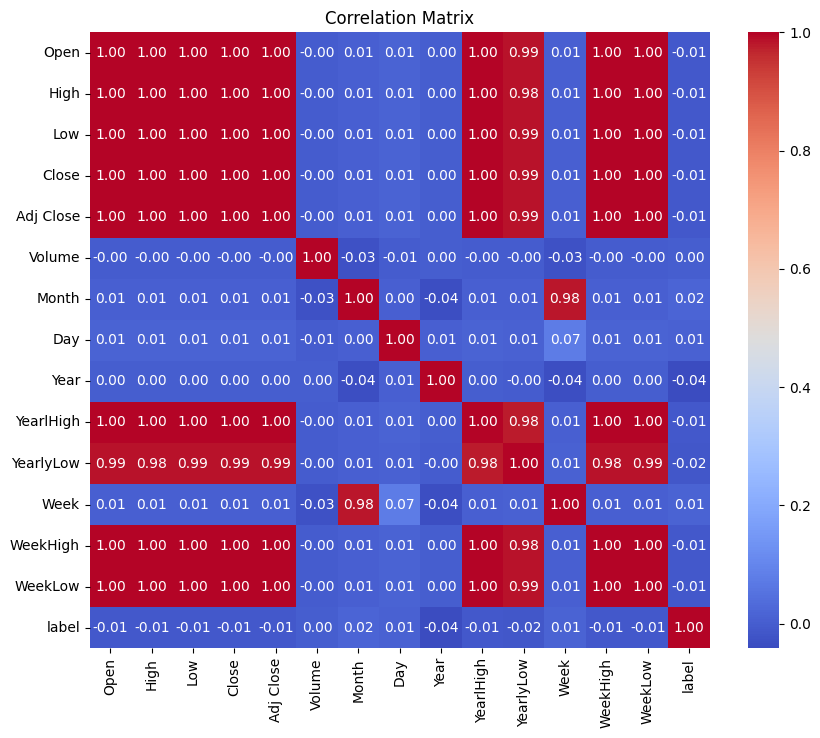

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the correlation matrix array to a Pandas DataFrame with column names
corr_df = pd.DataFrame(corr_array, columns=numerical_columns, index=numerical_columns)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
